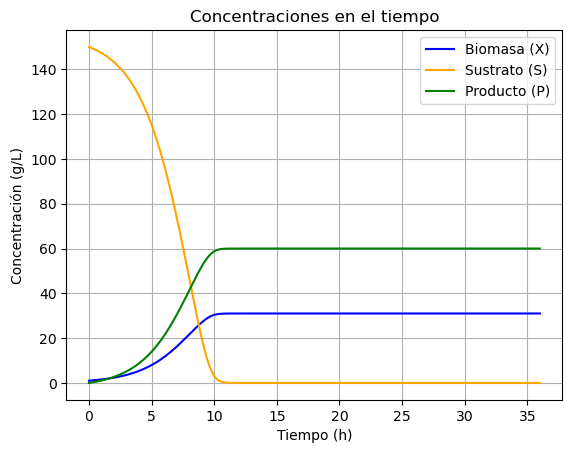

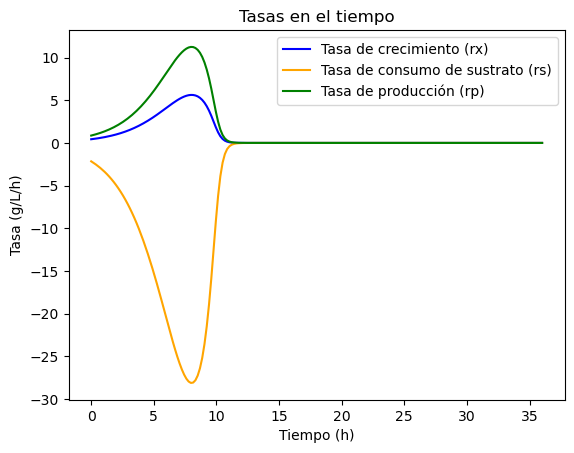

In [114]:
import numpy as np
from scipy.integrate import solve_ivp

def modelo1(t, c, params):
    X, S, P = c  
    mu_max, Ks, Pmax, n, Yxs, Yxp = params
    if P <= Pmax:
        mu = mu_max * (S / (Ks + S)) * (1 - P / Pmax) ** n  
    else:
        mu = 0
    dXdt = mu * X
    dSdt = -(mu * X) / Yxs
    dPdt = mu * X / Yxp

    return [dXdt, dSdt, dPdt]


c0 = [1, 150, 0]  # g/L
tspan = [0, 36]   # h
params = [0.46, # mu_max
          10, # Ks
          80, # Pmax
          0.52, # n 
          0.2, # Yxs
          0.5] # Yxp
mu_max, Ks, Pmax, n, Yxs, Yxp = params

sol = solve_ivp(
    modelo1,
    tspan,
    c0,
    args=(params,),
    method="RK45", 
    t_eval=np.linspace(tspan[0], tspan[1], 200),
)

T1 = sol.t
C1 = sol.y.T
X, S, P = C1.T

import matplotlib.pyplot as plt
plt.figure()
plt.plot(T1, X, label='Biomasa (X)', color='blue')
plt.plot(T1, S, label='Sustrato (S)', color='orange')
plt.plot(T1, P, label='Producto (P)', color='green')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (g/L)')
plt.title('Concentraciones en el tiempo')
plt.legend()
plt.grid()

rx = mu_max * (S / (Ks + S)) * (1 - P / Pmax) ** n * X
rs = - (mu_max * (S / (Ks + S)) * (1 - P / Pmax) ** n * X / Yxs)
rp = rx / Yxp
plt.figure()
plt.plot(T1, rx, label='Tasa de crecimiento (rx)', color='blue')
plt.plot(T1, rs, label='Tasa de consumo de sustrato (rs)', color='orange')
plt.plot(T1, rp, label='Tasa de producción (rp)', color='green')
plt.xlabel('Tiempo (h)')
plt.ylabel('Tasa (g/L/h)')
plt.title('Tasas en el tiempo')
plt.legend()

Text(0.5, 0, 'Tiempo (h)')

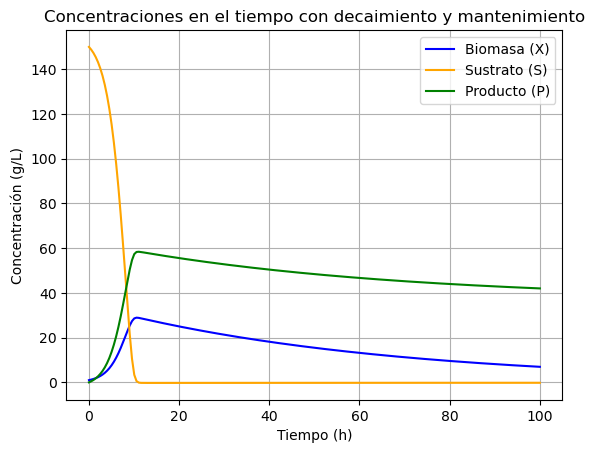

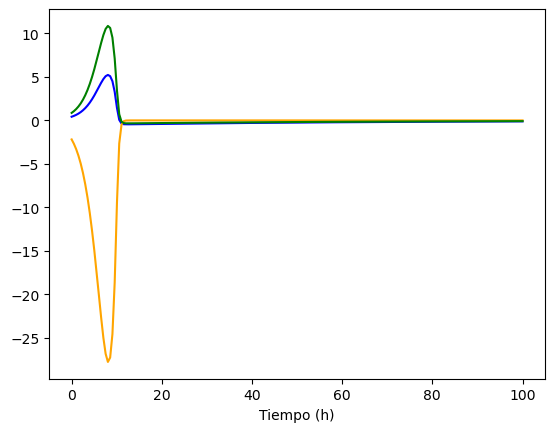

In [115]:
def modelo2(t, c, params):
    X, S, P = c  
    mu_max, Ks, Pmax, n, Yxs, Yxp, kd, m = params
    if P <= Pmax:
        mu = mu_max*(S/(Ks + S))*(1 - P/Pmax)**n
    else:
        mu = 0
    dXdt = (mu - kd) * X
    dSdt = -(mu / Yxs + m)  * X
    dPdt = mu * X / Yxp

    return [dXdt, dSdt, dPdt]

params2 = params + [
    0.01,  # kd
    0.03 # m
    ] 
mu_max, Ks, Pmax, n, Yxs, Yxp, kd, m = params2
tspan = [0, 100]   # h
sol = solve_ivp(
    modelo2,
    tspan,
    c0,
    args=(params2,),
    method="LSODA", 
    t_eval=np.linspace(tspan[0], tspan[1], 200),
)

T2 = sol.t
C2 = sol.y.T
X2, S2, P2 = C2.T   
plt.figure()
plt.plot(T2, X2, label='Biomasa (X)', color='blue')
plt.plot(T2, S2, label='Sustrato (S)', color='orange')
plt.plot(T2, P2, label='Producto (P)', color='green')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (g/L)')
plt.title('Concentraciones en el tiempo con decaimiento y mantenimiento')
plt.legend()
plt.grid()

mu = mu_max * (S2 / (Ks + S2)) * (1 - P2 / Pmax) ** n
rx = (mu - kd) * X2
rs = - (mu / Yxs + m) * X2
rp = mu * X2 / Yxp
plt.figure()
plt.plot(T2, rx, label='Tasa de crecimiento (rx)', color='blue')
plt.plot(T2, rs, label='Tasa de consumo de sustrato (rs)', color='orange')
plt.plot(T2, rp, label='Tasa de producción (rp)', color='green')
plt.xlabel('Tiempo (h)')    